In [0]:
%python
spark.read.json("/Volumes/new_work/new_schema/new_volume/users_extended.json",multiLine=True).show(3)

+-------------------+-----+--------------------+-----------+------------+-------+
|            address| name|         preferences|signup_date|subscription|user_id|
+-------------------+-----+--------------------+-----------+------------+-------+
|  {Chennai, 903618}|User1|{[Documentary, Co...| 2022-11-01|    Standard|     u1|
|   {Mumbai, 438363}|User2|{[Action, Drama],...| 2022-02-06|    Standard|     u2|
|{Hyderabad, 107835}|User3|{[Documentary, Ac...| 2022-01-21|     Premium|     u3|
+-------------------+-----+--------------------+-----------+------------+-------+
only showing top 3 rows


In [0]:
# users_df=spark.read.option('multiline', True).json('/Volumes/regex_catalog/regex_schema/regex_volume/users_extended.json')

# logs_df=spark.read.option('multiline', True).json('/Volumes/regex_catalog/regex_schema/regex_volume/viewing_logs_extended.json')



#vedios_df=spark.read.option('multiline', True).json('/Volumes/regex_catalog/regex_schema/regex_volume/videos_extended.json')

In [0]:
user_df = spark.read.json("/Volumes/new_work/new_schema/new_volume/users_extended.json",multiLine=True)

video_df = spark.read.json("/Volumes/new_work/new_schema/new_volume/videos_extended.json",multiLine=True)

logs_df = spark.read.json("/Volumes/new_work/new_schema/new_volume/viewing_logs_extended.json",multiLine=True)


In [0]:
user_df.select("preferences").show(3, False)


user_df.printSchema()

+------------------------------+
|preferences                   |
+------------------------------+
|{[Documentary, Comedy], false}|
|{[Action, Drama], false}      |
|{[Documentary, Action], true} |
+------------------------------+
only showing top 3 rows
root
 |-- address: struct (nullable = true)
 |    |-- city: string (nullable = true)
 |    |-- zip: string (nullable = true)
 |-- name: string (nullable = true)
 |-- preferences: struct (nullable = true)
 |    |-- genres: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- notifications: boolean (nullable = true)
 |-- signup_date: string (nullable = true)
 |-- subscription: string (nullable = true)
 |-- user_id: string (nullable = true)



In [0]:
user_df.printSchema()
video_df.printSchema()
logs_df.printSchema()

root
 |-- address: struct (nullable = true)
 |    |-- city: string (nullable = true)
 |    |-- zip: string (nullable = true)
 |-- name: string (nullable = true)
 |-- preferences: struct (nullable = true)
 |    |-- genres: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- notifications: boolean (nullable = true)
 |-- signup_date: string (nullable = true)
 |-- subscription: string (nullable = true)
 |-- user_id: string (nullable = true)

root
 |-- cast: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- name: string (nullable = true)
 |    |    |-- role: string (nullable = true)
 |-- duration: long (nullable = true)
 |-- genre: string (nullable = true)
 |-- ratings: struct (nullable = true)
 |    |-- average: double (nullable = true)
 |    |-- votes: long (nullable = true)
 |-- title: string (nullable = true)
 |-- video_id: string (nullable = true)

root
 |-- device: struct (nullable = true)
 |    |-- app_version: s

In [0]:
from pyspark.sql.functions import col, explode

users_flat = user_df.select(
    "user_id",
    "name",
    "signup_date",
    "subscription",
    col("address.city").alias("city"),
    col("address.zip").alias("zip"),
    col("preferences.genres").alias("preferences_genres"),
    col("preferences.notifications").alias("notifications_enabled")

)

users_flat.show(5, truncate =False)

+-------+-----+-----------+------------+---------+------+---------------------+---------------------+
|user_id|name |signup_date|subscription|city     |zip   |preferences_genres   |notifications_enabled|
+-------+-----+-----------+------------+---------+------+---------------------+---------------------+
|u1     |User1|2022-11-01 |Standard    |Chennai  |903618|[Documentary, Comedy]|false                |
|u2     |User2|2022-02-06 |Standard    |Mumbai   |438363|[Action, Drama]      |false                |
|u3     |User3|2022-01-21 |Premium     |Hyderabad|107835|[Documentary, Action]|true                 |
|u4     |User4|2022-03-04 |Premium     |Hyderabad|528387|[Thriller, Action]   |false                |
|u5     |User5|2022-11-29 |Standard    |Delhi    |425817|[Action, Thriller]   |true                 |
+-------+-----+-----------+------------+---------+------+---------------------+---------------------+
only showing top 5 rows


In [0]:


# Explod cast array and flaten table

video_flat = video_df.select(
    "video_id",
    "title",
    "genre",
    "duration",
    col("ratings.average").alias("average_rating"),
    col("ratings.votes").alias("vote_count"),
    explode("cast").alias("cast_member")

).select(
    "video_id","title","genre","duration","average_rating","vote_count",
    col("cast_member.name").alias("actor_name"),
    col("cast_member.role").alias("actor_role")

)
video_flat.show(5, truncate =False)


+--------+------+--------+--------+--------------+----------+----------+----------+
|video_id|title |genre   |duration|average_rating|vote_count|actor_name|actor_role|
+--------+------+--------+--------+--------------+----------+----------+----------+
|v1      |Video1|Thriller|124     |2.4           |1361      |Actor6    |Supporting|
|v1      |Video1|Thriller|124     |2.4           |1361      |Actor6    |Supporting|
|v2      |Video2|Drama   |58      |4.0           |1787      |Actor16   |Lead      |
|v2      |Video2|Drama   |58      |4.0           |1787      |Actor12   |Lead      |
|v3      |Video3|Thriller|175     |3.8           |1741      |Actor12   |Lead      |
+--------+------+--------+--------+--------------+----------+----------+----------+
only showing top 5 rows


In [0]:


users_flat= user_df.select(
    "name",
    "signup_date",
    col("address.city").alias("city"),
    col("address.zip").alias("zip"),
    explode(f.col("preferences.genres")).alias("genres"),
    col("preferences.notifications").alias("notification"),
    "subscription",
    "user_id"
)
users_flat.show(3)

+-----+-----------+-------+------+-----------+------------+------------+-------+
| name|signup_date|   city|   zip|     genres|notification|subscription|user_id|
+-----+-----------+-------+------+-----------+------------+------------+-------+
|User1| 2022-11-01|Chennai|903618|Documentary|       false|    Standard|     u1|
|User1| 2022-11-01|Chennai|903618|     Comedy|       false|    Standard|     u1|
|User2| 2022-02-06| Mumbai|438363|     Action|       false|    Standard|     u2|
+-----+-----------+-------+------+-----------+------------+------------+-------+
only showing top 3 rows


In [0]:
# root
#  |-- device: struct (nullable = true)
#  |    |-- app_version: string (nullable = true)
#  |    |-- os: string (nullable = true)
#  |    |-- type: string (nullable = true)
#  |-- user_id: string (nullable = true)
#  |-- video_id: string (nullable = true)
#  |-- view_date: string (nullable = true)
#  |-- watched_minutes: long (nullable = true)


view_log = logs_df.select(
    "user_id",
    "video_id",
    "view_date",
    "watched_minutes",
    col("device.app_version").alias("app_version"),
    col("device.os").alias("os"),
    col("device.type").alias("device_type")


)

view_log.show(3)

+-------+--------+----------+---------------+-----------+-------+-----------+
|user_id|video_id| view_date|watched_minutes|app_version|     os|device_type|
+-------+--------+----------+---------------+-----------+-------+-----------+
|    u10|      v5|2023-05-25|             63|      4.1.7|Windows|     Tablet|
|    u18|     v79|2023-04-19|             70|      1.6.8|    iOS|         TV|
|    u44|     v23|2023-04-14|            105|      5.7.0|    iOS|     Laptop|
+-------+--------+----------+---------------+-----------+-------+-----------+
only showing top 3 rows


In [0]:
#Goal :- Understand witch divces and os Cobinations dominates user engagement

from pyspark.sql.functions import count, sum

device_usage = view_log.groupBy("device_type", "os")\
    .agg(
        count("*").alias("total_views"), 
        sum("watched_minutes").alias("total_watch_time")
    ).orderBy("total_views", ascending=False)

device_usage.show()

+-----------+-------+-----------+----------------+
|device_type|     os|total_views|total_watch_time|
+-----------+-------+-----------+----------------+
|     Mobile|Android|         62|            3901|
|     Laptop|Android|         56|            3871|
|     Tablet|    iOS|         56|            3121|
|     Laptop|Windows|         54|            2493|
|     Tablet|Windows|         53|            2835|
|     Laptop|  Linux|         53|            2447|
|     Tablet|  Linux|         53|            3226|
|     Laptop|  macOS|         53|            2336|
|     Mobile|  Linux|         53|            2587|
|     Laptop|    iOS|         52|            2848|
|         TV|Android|         51|            2716|
|         TV|  macOS|         50|            2800|
|     Tablet|Android|         49|            2620|
|     Tablet|  macOS|         48|            2033|
|     Mobile|  macOS|         46|            2758|
|         TV|Windows|         44|            2331|
|         TV|  Linux|         4

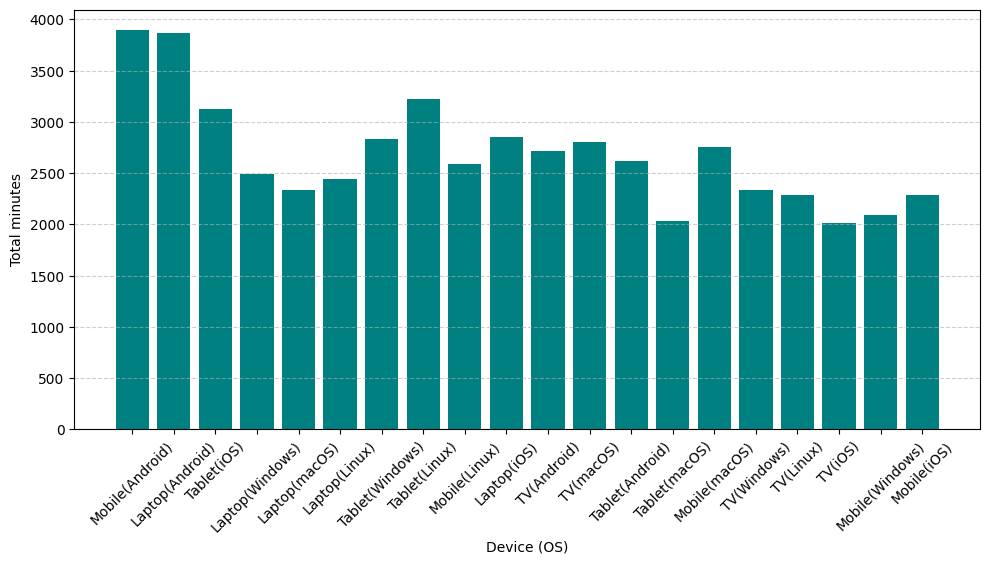

In [0]:
#convert to pandas 
device_usage_pd = device_usage.toPandas()
#bar chart
import matplotlib.pyplot as plt
  

plt.figure(figsize=(10,6))
device_usage_pd['label']=device_usage_pd['device_type'] + "(" + device_usage_pd['os']+")"
plt.bar(device_usage_pd['label'],device_usage_pd['total_watch_time'],color='teal')
plt.xticks(rotation=90)
plt.xlabel("Device (OS)")
plt.ylabel("Total minutes")
plt.grid(True,axis='y',linestyle='--',alpha=0.6)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [0]:
# Genre Popularity Weighted by watch time


#genre popularity Weighted by Watch Time
from pyspark.sql.functions import col, sum, countDistinct

genre_popularity = view_log.join(video_flat, view_log.video_id == video_flat.video_id) \
    .groupBy("genre") \
    .agg(
        sum("watched_minutes").alias("total_minutes"),
        countDistinct("user_id").alias("total_users")
    ) \
    .withColumn("weighted_popularity", col("total_minutes") / col("total_users")) \
    .orderBy("weighted_popularity", ascending=False)

display(genre_popularity)


genre,total_minutes,total_users,weighted_popularity
Sci-Fi,23048,49,470.3673469387755
Comedy,21668,50,433.36
Drama,15529,50,310.58
Action,14105,47,300.1063829787234
Thriller,13976,49,285.2244897959184
Documentary,9639,50,192.78
